In [1]:
%config Completer.use_jedi = False

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [5]:
x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype("float32") / 255.0

In [6]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
model = Sequential(
    [
        InputLayer(input_shape=(28 * 28)),
        Dense(512, activation='relu'), 
        Dense(256, activation='relu'),
        Dense(10),
    ]
)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


### Keras Model Traiing APIs - https://keras.io/api/models/model_training_apis/

In [9]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

In [12]:
EPOCHS = 5

In [11]:
history = model.fit(x_train, y_train, batch_size=32, epochs=EPOCHS, verbose=2)

Epoch 1/5
1875/1875 - 7s - loss: 0.1877 - accuracy: 0.9426
Epoch 2/5
1875/1875 - 4s - loss: 0.0795 - accuracy: 0.9749
Epoch 3/5
1875/1875 - 4s - loss: 0.0534 - accuracy: 0.9828
Epoch 4/5
1875/1875 - 4s - loss: 0.0434 - accuracy: 0.9865
Epoch 5/5
1875/1875 - 4s - loss: 0.0334 - accuracy: 0.9891


In [13]:
acc = history.history['accuracy']
loss=history.history['loss']
print(acc)
print(loss)

[0.9425833225250244, 0.9749333262443542, 0.982783317565918, 0.986466646194458, 0.9890999794006348]
[0.18768003582954407, 0.07951489090919495, 0.05343370884656906, 0.0433938167989254, 0.03342459350824356]


Text(0.5, 1.0, 'Training Accuracy and Loss')

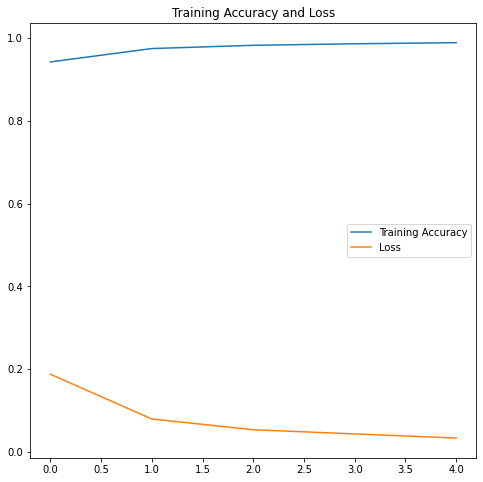

In [14]:
epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Loss')
plt.legend(loc='center right')
plt.title('Training Accuracy and Loss')

In [15]:
score = model.evaluate(x_test, y_test, batch_size=32, verbose=2)

313/313 - 1s - loss: 0.0707 - accuracy: 0.9799


In [16]:
y_pred = model.predict(x_test)

In [17]:
y_pred

array([[ -7.1606693 ,  -1.2972308 ,  -1.9537871 , ...,  14.314792  ,
         -7.3981214 ,  -1.393434  ],
       [ -8.989537  ,   3.2454166 ,  18.066132  , ...,   2.6402228 ,
         -8.62306   , -13.712062  ],
       [-10.321634  ,  12.610152  ,  -4.7721295 , ...,   0.96760386,
          1.1971765 ,  -6.2840147 ],
       ...,
       [-15.89612   ,  -9.804379  , -12.719433  , ...,  -2.8798935 ,
          2.5285685 ,   3.6132755 ],
       [ -9.347374  , -10.058667  , -11.651478  , ...,  -9.456345  ,
         10.497958  ,  -7.857521  ],
       [ -4.489052  , -12.075308  ,  -7.418884  , ..., -16.121628  ,
         -2.3913622 ,  -5.0975876 ]], dtype=float32)

Prediction of model: 1


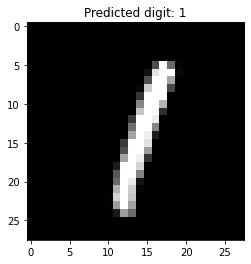

In [18]:
image = (x_test[5]).reshape(-1,28*28)
model_pred = np.argmax(model.predict(image), axis=-1)
print('Prediction of model: {}'.format(model_pred[0]))
plt.title("Predicted digit: {}".format(model_pred[0]))
plt.imshow(image.reshape(28,28), cmap=plt.get_cmap('gray'))

Prediction of model: 5


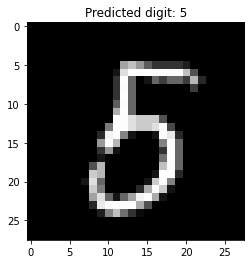

In [19]:
image = (x_test[45]).reshape(-1,28*28)
model_pred = np.argmax(model.predict(image), axis=-1)
print('Prediction of model: {}'.format(model_pred[0]))
plt.title("Predicted digit: {}".format(model_pred[0]))
plt.imshow(image.reshape(28,28), cmap=plt.get_cmap('gray'))